# **Apple Stocks Database**


[lasso regression](https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/#:~:text=Lasso%20regression%20is%20a%20regularization,i.e.%20models%20with%20fewer%20parameters)

[linear regression](https://medium.com/analytics-vidhya/using-linear-regression-to-predict-aapl-apple-stock-prices-in-python-1a629fbea15b)



1. Preprocessing: break into test and training and then training and validation to do Cross-Validation to estimate parameters

2. Regression model (scratch or sklearn)

3. Method to compute error of the model

In [ ]:
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
%cd /content/drive/My\ Drive/Colab Notebooks/Machine Learning/Project 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Machine Learning/Project


In [ ]:
from sklearn.linear_model import LinearRegression 
# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 
# matplotlib and seaborn are used for plotting graphs 
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

def warn(*args, **kwargs):
  pass
import warnings
warnings.warn = warn


In [ ]:
#Read the data into 'data' variable
data = pd.read_csv('AppleData.csv')
data.info


<bound method DataFrame.info of              Date        Open        High         Low       Close   Adj Close  \
0      12/12/1980    0.128348    0.128906    0.128348    0.128348    0.100178   
1      12/15/1980    0.122210    0.122210    0.121652    0.121652    0.094952   
2      12/16/1980    0.113281    0.113281    0.112723    0.112723    0.087983   
3      12/17/1980    0.115513    0.116071    0.115513    0.115513    0.090160   
4      12/18/1980    0.118862    0.119420    0.118862    0.118862    0.092774   
...           ...         ...         ...         ...         ...         ...   
10444   5/16/2022  145.550003  147.520004  144.179993  145.539993  145.539993   
10445   5/17/2022  148.860001  149.770004  146.679993  149.240005  149.240005   
10446   5/18/2022  146.850006  147.360001  139.899994  140.820007  140.820007   
10447   5/19/2022  139.880005  141.660004  136.600006  137.350006  137.350006   
10448   5/20/2022  139.089996  140.699997  132.610001  137.589996  137.589996

In [ ]:
[n,p] = data.shape

print("Number of Rows:",n)
print("Number of Columns:",p)

Number of Rows: 10449
Number of Columns: 7


In [ ]:
print("\n\nData Types :\n", data.dtypes)

print("\nContains NaN/Empty cells : ", data.isnull().values.any())
print("\nTotal empty cells by column :\n", data.isnull().sum())




Data Types :
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Contains NaN/Empty cells :  False

Total empty cells by column :
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


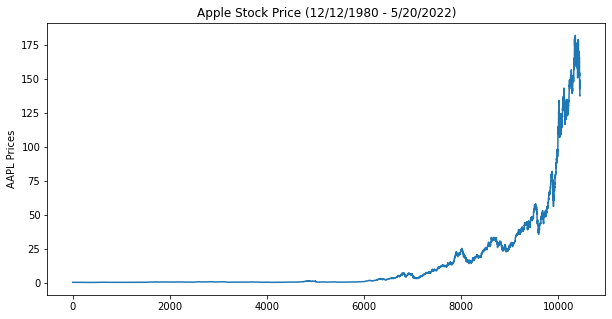

In [ ]:
#Apple Stock price graph:

data = pd.read_csv('AppleData.csv')
data=data[['Close']] 

# Plot the closing price of Apple 
data.Close.plot(figsize=(10,5)) 
plt.ylabel("AAPL Prices")
plt.title("Apple Stock Price (12/12/1980 - 5/20/2022)")
plt.show()

# Pre-Processing:

We do not need to replace invalid values since the stock price is an objective value with no subjective input variables.

We do not need to center the data since we are trying to predict the stock price based off of its currrent value. Centering would distort the actual price.

We do not need to encode any categorical variables since there are none in this dataset

We do not need to normalize since the dataset has no redundancy. Each sample is a different stock price with a different identifier ("date")



# Feature Analysis

* There are 5 dependent variables: Open, High, Low, Adj Close, and Volume

* There is 1 independent variable: Close

* There is 1 indexing variable: Date

* We are going to predict the variable 'Close' given the previous data

* The appropriate way to seperate the data is by randomly liking 20% 

# Feature Extraction:

* We extract Beta by computing the closed form solution for Least Squared Sum that would minimize the distances between the actual "Close" price and predicted regression.

* Later, during Lasso, we compute lambda using 5-fold Cross-Validation on the training data. 

* Dimensionality reduction and similar methods to PCA are not necessary since we are estimating based on current values instead of finding correlation between somewhat uncorrelated variables.

Equation for Linear Regression:

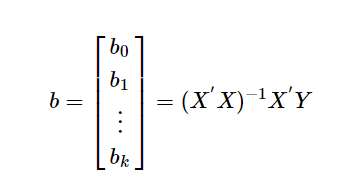

# Least Square Sum Linear Regression

In [ ]:
data = pd.read_csv('AppleData.csv')
data = data.dropna()

y = data['Close'];

X_aug = data[["Open","High","Low","Adj Close","Volume"]]

#add ones column to make augmented data matrix
X_aug['B0'] = 1

t=.8 
t = int(t*len(data)) 
# Train dataset 
X_train_ = X_aug[:t] 
y_train_ = y[:t]  
# Test dataset 
X_test_ = X_aug[t:] 
y_test_ = y[t:]

print(X_train_)

X_aug['B0'] = 1

# Computing the Beta using the training data
inv = np.linalg.inv(np.dot(X_train_.T,X_train_));

B_tilda = np.dot(np.dot(inv,X_train_.T),y_train_);

print("\nB_tilda\n",B_tilda)



           Open       High        Low  Adj Close      Volume  B0
0      0.128348   0.128906   0.128348   0.100178   469033600   1
1      0.122210   0.122210   0.121652   0.094952   175884800   1
2      0.113281   0.113281   0.112723   0.087983   105728000   1
3      0.115513   0.116071   0.115513   0.090160    86441600   1
4      0.118862   0.119420   0.118862   0.092774    73449600   1
...         ...        ...        ...        ...         ...  ..
8354  18.170000  18.392857  17.931070  15.996008  1065523200   1
8355  17.998215  18.120358  17.807858  15.814418   502810000   1
8356  17.947857  18.089287  17.739286  15.783785   678501600   1
8357  17.684999  17.911785  17.626785  15.809679   464797200   1
8358  17.950357  18.133215  17.832144  15.839048   401464000   1

[8359 rows x 6 columns]

B_tilda
 [-4.90302185e-01  7.45194482e-01  5.27012281e-01  2.50723510e-01
  1.19686802e-12  2.09352340e-03]


Prediction equation by plugging in Beta and the augmented matrix

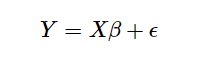

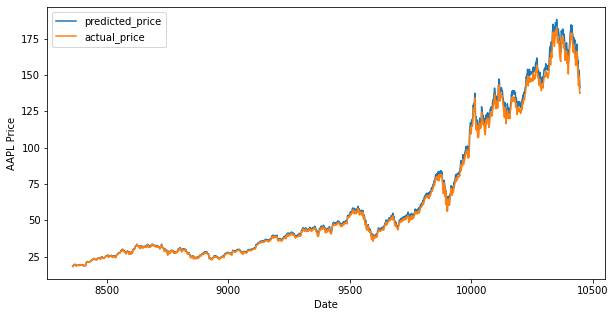

In [ ]:
#Calculate the predicted price using the Beta calculated above with the equation given:

predicted_close = np.zeros(len(X_test_));

i = 0;

#calculate the predicted 'close' price 
for index, row in X_test_.iterrows():
  predicted_close[i] = np.dot(row, B_tilda);
  i+=1;

predicted_close = pd.DataFrame(predicted_close,index=y_test_.index,columns = ['price'])  
predicted_close.plot(figsize=(10,5))  
y_test_.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("AAPL Price")  
plt.xlabel("Date")
plt.show()


R2 Score Calculation

In [ ]:
#Given the predicted values and the true values
def r2(predicted_close, y_test_eq):
  sst= 0;
  ssr = 0;
  for i in range(len(predicted_close)):
    sst += ((predicted_close.iloc[i] - y_test_eq.mean())**2)
    ssr += ((predicted_close.iloc[i] - y_test_eq.iloc[i])**2)

  r2 = 1-(ssr/sst)
  return(r2)


In [ ]:
#Calculate Error

#added 2 inputs 
score = r2(predicted_close, y_test_)*100
print("R2 error:", score.values[0])


R2 error: 99.71683306847099


## Least Squared Sum Regression using Sklearn

In [ ]:
data = pd.read_csv('AppleData.csv')
data = data[['Close']]

#Using 3 day and 9 day mean as features
data['3mean'] = data['Close'].shift(1).rolling(window=3).mean() 
data['9mean']= data['Close'].shift(1).rolling(window=9).mean() 
data= data.dropna() 
X = data[['3mean','9mean']] 
X.head()

,3mean,9mean
9,0.138393,0.126488
10,0.147135,0.129836
11,0.154762,0.134176
12,0.158668,0.139075
13,0.156622,0.143167


                Choose which features to use:
(3 day mean and 9 day mean) **OR** (Open, High, Low, Volume)

In [ ]:
#Using the original features
data = pd.read_csv('AppleData.csv')
data = data.dropna()
X = data[['High','Low','Volume']]
X.head()

,High,Low,Volume
0,0.128906,0.128348,469033600
1,0.122210,0.121652,175884800
2,0.113281,0.112723,105728000
3,0.116071,0.115513,86441600
4,0.119420,0.118862,73449600


In [ ]:
y = data['Close']
y.head()

0    0.128348
1    0.121652
2    0.112723
3    0.115513
4    0.118862
Name: Close, dtype: float64

In [ ]:
#80 - 20% split of the dataset into train and test

t=.8 
t = int(t*len(data)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]


            price
8359    18.072473
8360    18.241017
8361    18.233749
8362    18.572653
8363    18.753969
...           ...
10444  145.866842
10445  148.233496
10446  143.764723
10447  139.199135
10448  136.811282

[2090 rows x 1 columns]


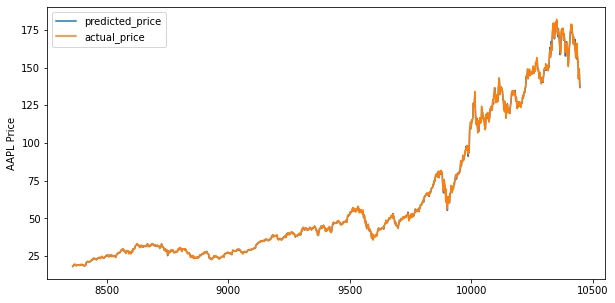

In [ ]:

linear = LinearRegression().fit(X_train,y_train)

predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
#predicted price plot 
print(predicted_price)
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("AAPL Price")  
plt.show()

In [ ]:
r2_score = linear.score(X[t:],y[t:])*100

print('Sklearn Linear regression accuracy:', float("{0:.2f}".format(r2_score)))



Sklearn Linear regression accuracy: 99.98


# LASSO Linear Regression

**Lasso Regression Methodology:**


1.   Split into training and test -> using training data, test multiple lambda 

2.   Using training data, test multiple lambda values (50)

3.   For each lambda do 5-fold on training data, use the inner training data to fit the model and use the validation fold to find the prediction.

4.  Calculate and sum the prediction errors of each fold.

5.  Find the average and compare to average for different lambda value.

6. Pick the lambda with smallest avg val error.

7. On the full training data build the model and predict the closing price (using 800 samples). 


In [ ]:
#Reset Data
data = pd.read_csv('AppleData.csv')

In [ ]:
#Train-Test Split

data = data.dropna()
y = data['Close'];

#X_aug = data[["Open","High","Low","Adj Close","Volume"]]
features = ["High","Volume"]
X_aug = data[["High","Volume", "Close"]]

t=.8 
t = int(t*len(data)) 
# Train dataset 
X_train_eq = X_aug[:t] 
y_train_eq = y[:t]
# Test dataset
X_test_eq = X_aug[t:]
y_test_eq = y[t:]


After splitting the dataset into train and test, the training data needs to be folded 5 times into inner training and the validation fold. Which is done sequentially below.

In [ ]:
#5 fold method
[n,p] = X_train_eq.shape

inter = round(n/5)

#folds

df = X_aug.reindex(np.random.permutation(X_aug.index))                                                          

df = df.reset_index(drop=True)                                                                                   

#Fold the features and the dependent variable "Close"
fold1 = df.loc[0:inter-1]                                            
fold2 = df.loc[(inter):2*(inter)-1]
fold3 = df.loc[2*(inter):3*(inter)-1]
fold4 = df.loc[3*(inter):4*(inter)-1]
fold5 = df.loc[4*(inter):n]

#Create train and validation datasets for each fold
train_val1 = pd.concat([fold1, fold2, fold3, fold4])
test_val1 = fold5

train_val2 = pd.concat([fold1, fold2, fold3, fold5])
test_val2 = fold4

train_val3 = pd.concat([fold1, fold2, fold4, fold5])
test_val3 = fold3

train_val4 = pd.concat([fold1, fold3, fold4, fold5])
test_val4 = fold2

train_val5 = pd.concat([fold2, fold3, fold4, fold5])
test_val5 = fold1


#For each train and validation break into X_aug, y_train, x_test1 and y

X_1 = train_val1[features]
y_train1 = train_val1[["Close"]]
x_test1 = test_val1[features]
y1 = test_val1[["Close"]]

X_2 = train_val2[features]
y_train2 = train_val2[["Close"]]
x_test2 = test_val2[features]
y2 = test_val2[["Close"]]

X_3 = train_val3[features]
y_train3 = train_val3[["Close"]]
x_test3 = test_val3[features]
y3 = test_val3[["Close"]]

X_4 = train_val4[features]
y_train4 = train_val4[["Close"]]
x_test4 = test_val4[features]
y4 = test_val4[["Close"]]

X_5 = train_val5[features]
y_train5 = train_val5[["Close"]]
x_test5 = test_val5[features]
y5 = test_val5[["Close"]]



In [ ]:
#All the prediction, feature learning, and error calculating methods.

#Given independent features matrix with or without 1, lambda value, and y_train. Returns vector B
def findB(X,l,y):
  
  [n, p] = X.shape

  add = np.dot(X.T, X) + l*(np.identity(p));
  inv = np.linalg.inv(add);

  B = np.dot(np.dot(inv,X.T),y);

  return(B)


#Given the validation data X_test is with 1, and Beta is with B0. return the array of predictions
def prediction(X_test, B):
  predicted_close = np.zeros(len(X_test));

  i = 0;
  #calculate the predicted 'close' price 
  for index, row in X_test.iterrows():
    predicted_close[i] = np.dot(row, B);
    i+=1;

  predicted_close = pd.DataFrame(predicted_close,index=y_test_eq.index,columns = ['price'])  
  return(predicted_close)


#Score function for computing the error
def score(y_pred, y_true):
  error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
  score = 1 - error
  return score


#Given the predicted values and the true values
def error(predicted_close, y_test_eq):
  sst= 0;
  ssr = 0;
  for i in range(len(predicted_close)):
    #print(predicted_close.iloc[i])
    sst += ((predicted_close.iloc[i].to_numpy() - y_test_eq.mean().to_numpy())**2)
    ssr += ((predicted_close.iloc[i].to_numpy() - y_test_eq.iloc[i].to_numpy())**2)

  r2 = (ssr/sst)
  return(r2)




Below we will compute the average validation error by doing cross validation and summing errors of each fold and finding the average. Comparing the average for each lambda value will tell us which lambda value minimizes the average error

In [ ]:
#Find avgError for all lamda values and find best lamda

lamda = np.logspace(-3, 3,50);

#used 100 as starting AvgError since it is large
bestlamda = [100,0]

for l in lamda:
  avgError = 0
                                                                          
  #what other parameters are necessary for Lasso other than alpha/lamda
  lasso_reg = Lasso(alpha = l, normalize=True)

                                                                                #1st Fold
  #Fitting the Training data to the Lasso regressor
  lasso_reg.fit(X_1,y_train1)

  #Predicting for 1st fold
  y_pred_lass = pd.DataFrame(lasso_reg.predict(x_test1))
  #print(x_test1)
  #print(y_pred_lass)
  avgError += error(y_pred_lass, y1)
  #print(avgError)

                                                                                #2nd Fold
  lasso_reg.fit(X_2,y_train2)
  y_pred_lass = pd.DataFrame(lasso_reg.predict(x_test2))
  avgError += error(y_pred_lass, y2)

                                                                                #3rd Fold
  lasso_reg.fit(X_3,y_train3)
  y_pred_lass = pd.DataFrame(lasso_reg.predict(x_test3))
  avgError += error(y_pred_lass, y3)  

                                                                                #4th Fold
  lasso_reg.fit(X_4,y_train4)
  y_pred_lass = pd.DataFrame(lasso_reg.predict(x_test4))
  avgError += error(y_pred_lass, y4)

                                                                                #5th Fold                                                                               
  lasso_reg.fit(X_5,y_train5)
  y_pred_lass = pd.DataFrame(lasso_reg.predict(x_test5))
  avgError += error(y_pred_lass, y5)

  avgError = avgError/5;
  print("\nAverage Error: ", avgError)
  print("Lambda: ", l)


  if avgError[0] < bestlamda[0]:
    bestlamda[0] = avgError
    bestlamda[1] = l

#Used Cross-Validation and prediction with Sklearn: Look at Bibliography for more information


Average Error:  [0.00017136]
Lambda:  0.001

Average Error:  [0.00017676]
Lambda:  0.0013257113655901094

Average Error:  [0.0001862]
Lambda:  0.0017575106248547913

Average Error:  [0.00020276]
Lambda:  0.002329951810515372

Average Error:  [0.00023188]
Lambda:  0.0030888435964774815

Average Error:  [0.00028325]
Lambda:  0.004094915062380427

Average Error:  [0.00037413]
Lambda:  0.005428675439323859

Average Error:  [0.00053554]
Lambda:  0.0071968567300115215

Average Error:  [0.00082353]
Lambda:  0.009540954763499945

Average Error:  [0.0013404]
Lambda:  0.012648552168552958

Average Error:  [0.00227524]
Lambda:  0.016768329368110083

Average Error:  [0.00398358]
Lambda:  0.022229964825261943

Average Error:  [0.00714916]
Lambda:  0.029470517025518096

Average Error:  [0.01312788]
Lambda:  0.03906939937054617

Average Error:  [0.02472298]
Lambda:  0.0517947467923121

Average Error:  [0.04807289]
Lambda:  0.06866488450043001

Average Error:  [0.09775023]
Lambda:  0.0910298177991521

In [ ]:
print("Best Lambda = ", bestlamda[1])

Best Lambda =  0.001


# Methods of LASSO Sklearn:

LASSO uses Coordinate descent to iteratively update the coefficients of a model in a particular order. Its an optimization problem that determines the values of the model coefficients that minimize the loss function while also applying a penalty on the size of the coefficients with L1 regularization.


Using the full training data and the lambda value to find the prediction on the test data.

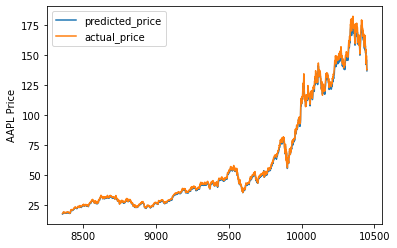

In [ ]:
#Create the Lasso model
lasso_ = Lasso(alpha = bestlamda[1], normalize=True)

#Fitting the Training data to the Lasso regressor
lasso_.fit(X_train_eq,y_train_eq)

y_pred_lass = pd.DataFrame(lasso_.predict(X_test_eq))
#print(y_pred_lass)

 
#predicted price plot 
#print(y_test_eq.index)
plt.plot(y_test_eq.index.values, y_pred_lass.to_numpy())  
y_test_eq.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("AAPL Price")  
plt.show()

In [ ]:
#Using the lamda calculated in the Cross Validation, the R2 score for the prediction is given:
score = r2(y_pred_lass, y_test_eq)*100
print("R2 error:", score.values[0])

R2 error: 99.89024274765411


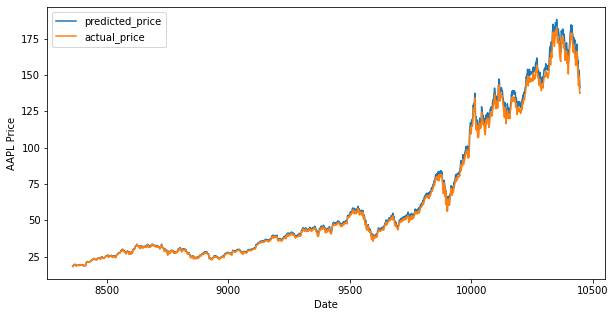

In [ ]:
#Same plot from LSS in previous part (for comparison with LASSO)
predicted_close.plot(figsize=(10,5))  
y_test_.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("AAPL Price")  
plt.xlabel("Date")
plt.show()

# Comparative Analysis:

Looking at the two plots for Lasso and LSS side by side, We can see there is an over prediction in the LSS model and slight underprediction in the Lasso model.

Otherwise they are very well fitted. This is due to the high correlation of the features used. Since our features: High, Low, and Open are great estimates due to Apple's low volatility. The predictions will be highly accurate given by the high R2 score.

LASSO requires more computational complexity since we need to do Cross-Validation to estimate the lambda parameter and minimize the prediction estimator for Beta.

While LASSO is more computationally intensive it is the better model in general. if we are predicting a more volitile stock or crypto currency. LASSO could smooth out the outliers and provide a better estimate.


# Ethical Issues

In general, stock price regression is a useful tool but has some downfalls when investments are made purely from algorithmic computation. This can lead to overfitting if enough capital is traded in this fashion. It can collapse the stock market and have disasterous affects on the world economy. That is why some companies like JPMorgan worry that too many investments are made using these methods.



# Bibliography

Used for LSS Linear Regression:

*   https://medium.com/analytics-vidhya/using-linear-regression-to-predict-aapl-apple-stock-prices-in-python-1a629fbea15b\

Used for Cross-Validation:

* https://www.kaggle.com/code/joycpkxatze/k-fold-cross-validation-from-scratch-python


Used for LASSO:

* https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/#:~:text=Lasso%20regression%20is%20a%20regularization,i.e.%20models%20with%20fewer%20parameters).
*   https://analyticsindiamag.com/lasso-regression-in-python-with-machinehack-data-science-hackathon/ 
*   https://analyticsindiamag.com/a-complete-guide-to-cracking-the-predicting-restaurant-food-cost-hackathon-by-machinehack/

Used for Ethical Issues:

* https://www.cnbc.com/2017/06/13/death-of-the-human-investor-just-10-percent-of-trading-is-regular-stock-picking-jpmorgan-estimates.html 

General Equations and Understanding:

* ISL Textbook
